In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras

In [ ]:
# Download the dataset if it hasn't already been downloaded.
from pathlib import Path
if not Path("hurricane").exists():
  print("Downloading dataset...")
  !wget https://pat-laub.github.io/DeepLearningMaterials/2023/Lecture-4-Computer-Vision/hurricane.zip
  !unzip hurricane.zip
else:
  print("Already downloaded.")

Streaming output truncated to the last 5000 lines.
  inflating: hurricane/no_damage/-95.290402_29.608634000000002.jpeg  
  inflating: hurricane/no_damage/-95.290477_29.607621999999996.jpeg  
  inflating: hurricane/no_damage/-95.290595_29.607621999999996.jpeg  
  inflating: hurricane/no_damage/-95.290627_29.400714.jpeg  
  inflating: hurricane/no_damage/-95.290646_29.608632.jpeg  
  inflating: hurricane/no_damage/-95.290729_29.607621999999996.jpeg  
  inflating: hurricane/no_damage/-95.29079899999999_29.402665999999996.jpeg  
  inflating: hurricane/no_damage/-95.291042_29.402655.jpeg  
  inflating: hurricane/no_damage/-95.291228_29.402317.jpeg  
  inflating: hurricane/no_damage/-95.291363_29.400990000000004.jpeg  
  inflating: hurricane/no_damage/-95.29164499999999_29.595205.jpeg  
  inflating: hurricane/no_damage/-95.29172700000001_29.402413.jpeg  
  inflating: hurricane/no_damage/-95.292333_29.401585999999998.jpeg  
  inflating: hurricane/no_damage/-95.29348_29.593476000000003.jpeg  


In [ ]:
!pip install directory_tree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from directory_tree import display_tree
display_tree("hurricane")

Streaming output truncated to the last 5000 lines.
    ├── -95.290477_29.607621999999996.jpeg
    ├── -95.2904_29.608598999999998.jpeg
    ├── -95.290595_29.607621999999996.jpeg
    ├── -95.290627_29.400714.jpeg
    ├── -95.290646_29.608632.jpeg
    ├── -95.290729_29.607621999999996.jpeg
    ├── -95.29079899999999_29.402665999999996.jpeg
    ├── -95.291042_29.402655.jpeg
    ├── -95.291228_29.402317.jpeg
    ├── -95.291363_29.400990000000004.jpeg
    ├── -95.29164499999999_29.595205.jpeg
    ├── -95.29172700000001_29.402413.jpeg
    ├── -95.292333_29.401585999999998.jpeg
    ├── -95.29348_29.593476000000003.jpeg
    ├── -95.293848_29.598968.jpeg
    ├── -95.293892_29.462031.jpeg
    ├── -95.293921_29.462253000000004.jpeg
    ├── -95.294025_29.462993.jpeg
    ├── -95.294034_29.598758.jpeg
    ├── -95.294048_29.462803000000005.jpeg
    ├── -95.294093_29.463841.jpeg
    ├── -95.294134_29.463093.jpeg
    ├── -95.294211_29.462909000000003.jpeg
    ├── -95.294251_29.463157.jpeg
    ├── -95.2

In [ ]:
tree = display_tree("hurricane", string_rep=True).split("\n")
print("\n".join(tree[:12]))
print("...")
print("\n".join(tree[-4:]))

hurricane/
├── damage/
│   ├── -93.528502_30.987438.jpeg
│   ├── -93.5302_30.988157.jpeg
│   ├── -93.53950999999999_30.982944.jpeg
│   ├── -93.539521_30.982434.jpeg
│   ├── -93.540151_30.982689.jpeg
│   ├── -93.547871_30.900207.jpeg
│   ├── -93.548123_30.900623.jpeg
│   ├── -93.54819300000001_30.901116.jpeg
│   ├── -93.553566_30.842361999999998.jpeg
│   ├── -93.558326_30.895248.jpeg
...
    ├── -97.001677_28.864984000000003.jpeg
    ├── -97.001948_28.633053999999998.jpeg
    └── -97.001979_28.623572999999997.jpeg



In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio("hurricane", output="hurricane-split",
    seed=1337, ratio=(5/7, 1/7, 1/7))

display_tree("hurricane-split", max_depth=1)

Copying files: 21492 files [00:02, 8622.59 files/s] 

hurricane-split/
├── test/
├── train/
└── val/


In [ ]:
from tensorflow.keras.utils import\
  image_dataset_from_directory

data_dir = "hurricane-split"
batch_size = 32
img_height = 80
img_width = 80
img_size = (img_height, img_width)

In [ ]:
val_ds = image_dataset_from_directory(
    data_dir + "/val",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    color_mode='grayscale')

Found 3069 files belonging to 2 classes.


In [ ]:
train_ds = image_dataset_from_directory(
    data_dir + "/train",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    color_mode='grayscale')

Found 15350 files belonging to 2 classes.


In [ ]:
test_ds = image_dataset_from_directory(
    data_dir + "/test",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    color_mode='grayscale')

Found 3073 files belonging to 2 classes.


In [ ]:
print(train_ds.class_names)

['damage', 'no_damage']


In [ ]:
# NB: Need shuffle=False earlier for these X & y to line up.
X_train = np.concatenate(list(train_ds.map(lambda x, y: x)))
y_train = np.concatenate(list(train_ds.map(lambda x, y: y)))

X_val = np.concatenate(list(val_ds.map(lambda x, y: x)))
y_val = np.concatenate(list(val_ds.map(lambda x, y: y)))

X_test = np.concatenate(list(test_ds.map(lambda x, y: x)))
y_test = np.concatenate(list(test_ds.map(lambda x, y: y)))

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((15350, 80, 80, 1),
 (15350,),
 (3069, 80, 80, 1),
 (3069,),
 (3073, 80, 80, 1),
 (3073,))

In [ ]:
from tensorflow.keras.layers \
  import Rescaling, Conv2D, MaxPooling2D, Flatten

numClasses = np.unique(y_train).shape[0]
random.seed(123)

model = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  Conv2D(16, 3, padding="same", activation="relu", name="conv1"),
  MaxPooling2D(name="pool1"),
  Conv2D(32, 3, padding="same", activation="relu", name="conv2"),
  MaxPooling2D(name="pool2"),
  Conv2D(64, 3, padding="same", activation="relu", name="conv3"),
  MaxPooling2D(name="pool3"),
  Flatten(), Dense(128, activation="relu"), Dense(numClasses)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 80, 80, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 80, 80, 16)        160       
                                                                 
 pool1 (MaxPooling2D)        (None, 40, 40, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 32)        4640      
                                                                 
 pool2 (MaxPooling2D)        (None, 20, 20, 32)        0         
                                                                 
 conv3 (Conv2D)              (None, 20, 20, 64)        18496     
                                                                 
 pool3 (MaxPooling2D)        (None, 10, 10, 64)        0

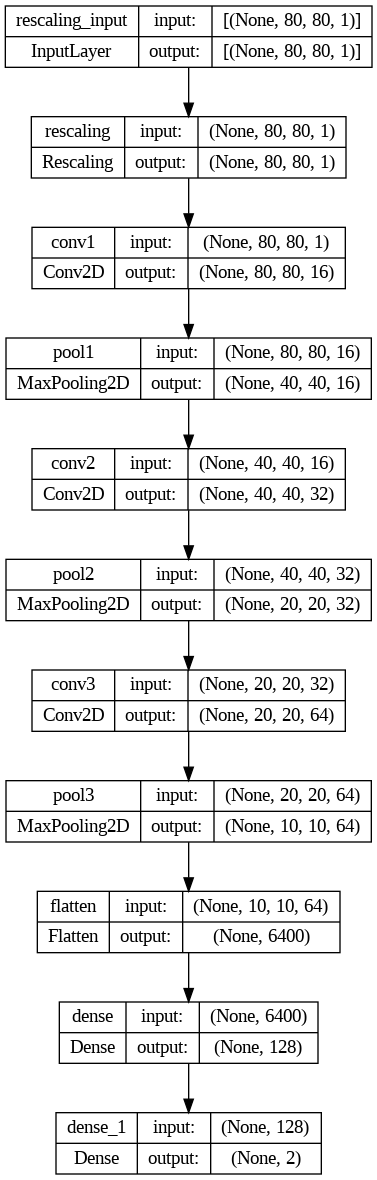

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
topk = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=100)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy', topk])

epochs = 100
es = EarlyStopping(patience=15, restore_best_weights=True,
    monitor="val_accuracy", verbose=2)

hist = model.fit(train_ds.shuffle(1000), validation_data=val_ds,
  epochs=epochs, callbacks=[es], verbose=0)

Restoring model weights from the end of the best epoch: 28.
Epoch 43: early stopping


In [ ]:
def plot_history(hist):
    epochs = range(len(hist.history["loss"]))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, hist.history["accuracy"], label="Train")
    plt.plot(epochs, hist.history["val_accuracy"], label="Val")
    plt.legend(loc="lower right")
    plt.title("Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(epochs, hist.history["loss"], label="Train")
    plt.plot(epochs, hist.history["val_loss"], label="Val")
    plt.legend(loc="upper right")
    plt.title("Loss")
    plt.show()

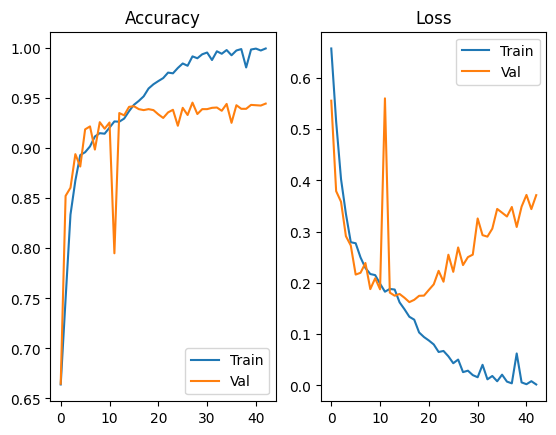

In [ ]:
plot_history(hist)

In [ ]:
print(model.evaluate(train_ds, verbose=0))
print(model.evaluate(val_ds, verbose=0))
print(model.evaluate(test_ds, verbose=0))

[0.01583860069513321, 0.9955049157142639, 1.0]
[0.2348007708787918, 0.9455848932266235, 1.0]
[0.27505970001220703, 0.9371949434280396, 1.0]


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    model.add(Rescaling(1./255, input_shape=(img_height, img_width, 1)))

    model.add(Conv2D(hp.Choice("neurons", [4, 8, 16, 32, 64, 128, 256]), 3, padding="same", activation=hp.Choice("activation", ["relu", "leaky_relu", "tanh"]), name="conv1"))

    model.add(MaxPooling2D(name="pool1"))

    model.add(Conv2D(hp.Choice("neurons", [4, 8, 16, 32, 64, 128, 256]), 3, padding="same", activation=hp.Choice("activation", ["relu", "leaky_relu", "tanh"]), name="conv2"))

    model.add(MaxPooling2D(name="pool2"))

    model.add(Conv2D(hp.Choice("neurons", [4, 8, 16, 32, 64, 128, 256]), 3, padding="same", activation=hp.Choice("activation", ["relu", "leaky_relu", "tanh"]), name="conv3"))

    model.add(MaxPooling2D(name="pool3"))

    model.add(Flatten())

    model.add(Dense(128, activation="relu"))

    model.add(Dense(numClasses))

    learning_rate = hp.Float("lr",
        min_value=1e-4, max_value=1e-2, sampling="log")
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    topk = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=100)

    model.compile(optimizer=opt, loss=loss, metrics=['accuracy', topk])

    return model

In [ ]:
tuner = kt.RandomSearch(
  build_model,
  objective="val_loss",
  max_trials=10,
  directory="random-search")

es = EarlyStopping(patience=3,
  restore_best_weights=True)

tuner.search(X_train, y_train,
  epochs=100, callbacks = [es],
  validation_data=(X_val, y_val))

best_model = tuner.get_best_models()[0]

Trial 10 Complete [00h 00m 49s]
val_loss: 0.6378607749938965

Best val_loss So Far: 0.1267809271812439
Total elapsed time: 00h 13m 15s


In [ ]:
tuner.results_summary()

Results summary
Results in random-search/untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 02 summary
Hyperparameters:
neurons: 16
activation: relu
lr: 0.00018008169256644553
Score: 0.1267809271812439

Trial 07 summary
Hyperparameters:
neurons: 256
activation: leaky_relu
lr: 0.0005217911845630866
Score: 0.13139896094799042

Trial 06 summary
Hyperparameters:
neurons: 32
activation: relu
lr: 0.0013975022837960525
Score: 0.13201507925987244

Trial 03 summary
Hyperparameters:
neurons: 16
activation: relu
lr: 0.0009596496158057221
Score: 0.13350194692611694

Trial 08 summary
Hyperparameters:
neurons: 16
activation: relu
lr: 0.00019397829726650642
Score: 0.13755962252616882

Trial 05 summary
Hyperparameters:
neurons: 16
activation: leaky_relu
lr: 0.0012625167450314107
Score: 0.1563742607831955

Trial 04 summary
Hyperparameters:
neurons: 64
activation: tanh
lr: 0.0001087053376637337
Score: 0.1817009001970291

Trial 01 summary
Hyperparameters:
neurons: 

In [ ]:
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 80, 80, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 80, 80, 16)        160       
                                                                 
 pool1 (MaxPooling2D)        (None, 40, 40, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 16)        2320      
                                                                 
 pool2 (MaxPooling2D)        (None, 20, 20, 16)        0         
                                                                 
 conv3 (Conv2D)              (None, 20, 20, 16)        2320      
                                                                 
 pool3 (MaxPooling2D)        (None, 10, 10, 16)        0

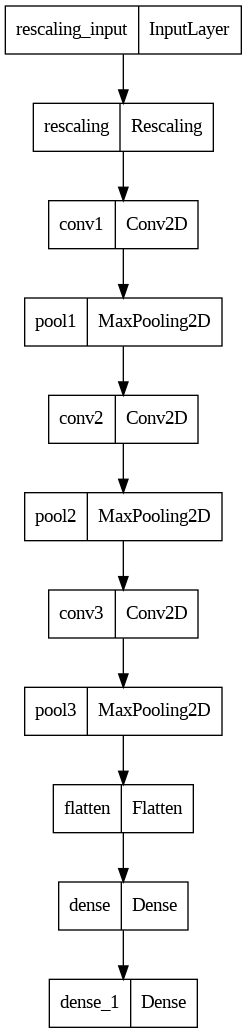

In [ ]:
plot_model(best_model)

In [ ]:
print(best_model.evaluate(train_ds, verbose=0))
print(best_model.evaluate(val_ds, verbose=0))
print(best_model.evaluate(test_ds, verbose=0))

[0.08188651502132416, 0.9705537557601929, 1.0]
[0.1267809271812439, 0.9550341963768005, 1.0]
[0.12963931262493134, 0.9518386125564575, 1.0]
